Minimum Distance: 0.0037
Point: 0.004118763328460305


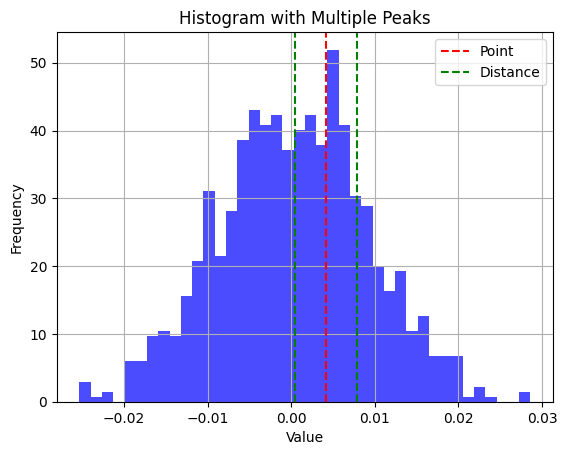

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math
import glob
from tqdm import tqdm

data = np.load('output/data/data_1.npz')
data = data['x'].flatten()

len_data = len(data)

sampling_distance = 1e-4


def count_elements_within_distance(data, distance):
    count_list = []

    for i in range(len(data)):
        count = 0
        for j in range(len(data)):
            if abs(data[j] - data[i]) <= distance:
                count += 1
        count_list.append(count)

    return count_list


def find_element_within_distance(data, start_distance):
    distances = np.arange(start_distance, max(data) - min(data) + sampling_distance, sampling_distance)
    count_list_array = np.zeros((len(distances), len(data)))

    for i, distance in enumerate(distances):
        count_list = count_elements_within_distance(data, distance)
        count_list_array[i] = count_list

    return count_list_array


def find_min_distance_point(data):
    start_distance = 0
    count_list_array = find_element_within_distance(data, start_distance)
    threshold = math.ceil(0.3 * len_data)

    for i, row in enumerate(count_list_array):
        if any(value >= threshold for value in row):
            max_index = np.argmax(row)
            min_distance = (i + 1) * sampling_distance  # Convert index to distance
            point = data[max_index]
            return min_distance, point

    return None


result = find_min_distance_point(data)
if result:
    min_distance, point = result
    print("Minimum Distance:", min_distance)
    print("Point:", point)
else:
    print("No point found.")

# Plot histogram with point and distance
plt.hist(data, bins=40, density=True, alpha=0.7, color='blue')
plt.axvline(x=point, color='red', linestyle='--', label='Point')
plt.axvline(x=point - min_distance, color='green', linestyle='--', label='Distance')
plt.axvline(x=point + min_distance, color='green', linestyle='--')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Multiple Peaks')
plt.legend()
plt.grid(True)
plt.show()


FASTER

Minimum Distance: 0.0035151615965925828
Point: 0.004118763328460305


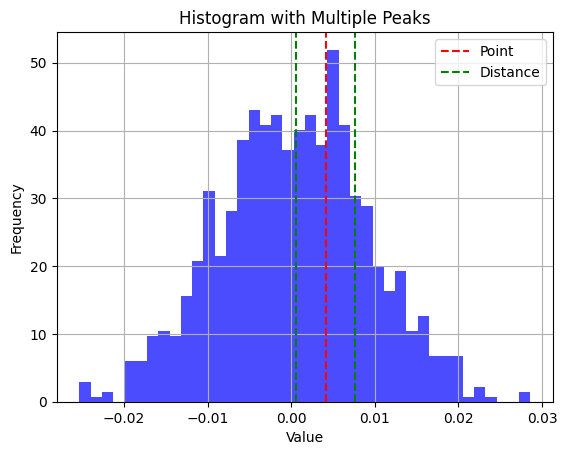

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
import glob
from tqdm import tqdm

data = np.load('output/data/data_1.npz')
data = data['x'].flatten()

len_data = len(data)

sampling_distance = 1e-4


def count_elements_within_distance(data, distance, point):
    count = 0

    for i in range(len(data)):
        if abs(data[i] - point) <= distance:
            count += 1

    return count


def find_min_distance_point(data):
    
    start_distance = 0
    threshold = math.ceil(0.3 * len_data)

    for distance in np.arange(start_distance, max(data) - min(data) + sampling_distance, sampling_distance):
        max_count = 0
        max_point = None
        for point in data:
            count = count_elements_within_distance(data, distance, point)
            if count >= threshold and count > max_count:
                max_count = count
                max_point = point
        if max_point is not None:
            min_distance = distance
            point = max_point
            return min_distance, point

    return None


result = find_min_distance_point(data)
if result:
    min_distance, point = result
    print("Minimum Distance:", min_distance)
    print("Point:", point)
else:
    print("No point found.")

# Plot histogram with point and distance
plt.hist(data, bins=40, density=True, alpha=0.7, color='blue')
plt.axvline(x=point, color='red', linestyle='--', label='Point')
plt.axvline(x=point - min_distance, color='green', linestyle='--', label='Distance')
plt.axvline(x=point + min_distance, color='green', linestyle='--')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Multiple Peaks')
plt.legend()
plt.grid(True)
plt.show()
